<a href="https://colab.research.google.com/github/Shawnap8177/MICS/blob/main/Using_AI_to_Forecast_Mass_Shootings_A_Keyword_Driven_Predictive_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
pd.options.display.max_columns = None
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
df_shootings = pd.read_csv("/Mother Jones - Mass Shootings Database.csv",encoding='utf-8')
#df_shootings = pd.read_csv("data\\US Mass Shootings May 24 2022.csv")




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
df_shootings.head()

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,mental_health_details,weapons_obtained_legally,where_obtained,weapon_type,weapon_details,race,gender,sources,mental_health_sources,sources_additional_age,latitude,longitude,type,year,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,LGBTQ club shooting,"Colorado Springs, Colorado",11/19/22,"Anderson L. Aldrich, 22, wore body armor and o...",5,25,30,Other,22,yes,Aldrich reportedly had a history of menacing b...,-,-,semiautomatic rifle; semiautomatic handgun,-,White,M,https://coloradosun.com/2022/11/20/club-q-shoo...,https://www.nytimes.com/2022/11/20/us/colorado...,-,-,-,Mass,2022,NaN,NaN,NaN,NaN
1,University of Virginia shooting,"Charlottesville, Virginia",11/13/22,"Christopher Darnell Jones Jr., 22, allegedly o...",3,2,5,School,22,-,-,-,-,-,-,Black,M,https://www.washingtonpost.com/nation/2022/11/...,-,-,-,-,Mass,2022,NaN,NaN,NaN,NaN
2,Raleigh spree shooting,"Hedingham, North Carolina",10/13/22,"Austin Thompson, 15, went on a rampage in the ...",5,2,7,Other,15,-,-,-,-,"semiautomatic rifle, semiautomatic handgun",NaN,White,M,https://www.newsobserver.com/news/local/crime/...,-,-,-,-,Spree,2022,NaN,NaN,NaN,NaN
3,Greenwood Park Mall shooting,"Greenwood, Indiana",7/17/22,"Jonathan Sapirman, 20, opened fire in a mall f...",3,2,5,workplace,20,-,-,yes,in Greenwood,semiautomatic rifles; semiautomatic handgun,Sig Sauer M400 rifle,White,M,https://apnews.com/article/indiana-mall-shooti...,-,-,-,-,Mass,2022,NaN,NaN,NaN,NaN
4,Highland Park July 4 parade shooting,"Highland Park, Illinois",7/4/22,"Suspected gunman Robert ""Bobby"" Crimo, 21, all...",7,46,53,Other,21,-,-,yes,"legally purchased by the shooter in the ""great...",semiautomatic rifle,"AR-15 style rifle, possibly modified for rapid...",White,M,https://www.cbsnews.com/chicago/news/suspect-i...,-,-,-,-,Mass,2022,NaN,NaN,NaN,NaN


In [ ]:
df_shootings["weapon_details"].isna()


0      False
1      False
2       True
3      False
4      False
       ...  
131    False
132    False
133    False
134    False
135    False
Name: weapon_details, Length: 136, dtype: bool

In [ ]:

df_shootings.columns

Index(['case', 'location', 'date', 'summary', 'fatalities', 'injured',
       'total_victims', 'location.1', 'age_of_shooter',
       'prior_signs_mental_health_issues', 'mental_health_details',
       'weapons_obtained_legally', 'where_obtained', 'weapon_type',
       'weapon_details', 'race', 'gender', 'sources', 'mental_health_sources',
       'sources_additional_age', 'latitude', 'longitude', 'type', 'year',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27'],
      dtype='object')

In [ ]:
df_shootings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   case                              136 non-null    object 
 1   location                          136 non-null    object 
 2   date                              136 non-null    object 
 3   summary                           136 non-null    object 
 4   fatalities                        136 non-null    int64  
 5   injured                           136 non-null    object 
 6   total_victims                     136 non-null    object 
 7   location.1                        136 non-null    object 
 8   age_of_shooter                    136 non-null    object 
 9   prior_signs_mental_health_issues  136 non-null    object 
 10  mental_health_details             136 non-null    object 
 11  weapons_obtained_legally          136 non-null    object 
 12  where_ob

In [ ]:
print(df_shootings.summary)

0      Anderson L. Aldrich, 22, wore body armor and o...
1      Christopher Darnell Jones Jr., 22, allegedly o...
2      Austin Thompson, 15, went on a rampage in the ...
3      Jonathan Sapirman, 20, opened fire in a mall f...
4      Suspected gunman Robert "Bobby" Crimo, 21, all...
                             ...                        
131    Retired librarian William Cruse, 59, was paran...
132    Postal worker Patrick Sherrill, 44, opened fir...
133    James Oliver Huberty, 41, opened fire in a McD...
134    Abdelkrim Belachheb, 39, opened fire at an ups...
135    Junior high school teacher Carl Robert Brown, ...
Name: summary, Length: 136, dtype: object


In [ ]:
df_shootings["where_obtained"].value_counts()


-                                            42
Unknown                                      15
Unclear                                       4
TBD                                           3
Purchased from an individual                  2
                                             ..
Assembled a rifle out of component parts.     1
Florida Gun Center                            1
Sharpshooters Small Arms Range                1
Local gun store in Killeen, Guns Galore       1
Garcia Gun Center in Hialeah, Fla.            1
Name: where_obtained, Length: 75, dtype: int64

In [ ]:
#targets
#df_shootings[["prior_signs_mental_health_issues"]].value_counts()
#df_shootings[["location.1"]].value_counts()
#df_shootings[["type"]].value_counts()
df_shootings[["weapons_obtained_legally"]].value_counts()
#


weapons_obtained_legally                                                                                                           
Yes                                                                                                                                    80
No                                                                                                                                     16
-                                                                                                                                      15
TBD                                                                                                                                     7
yes                                                                                                                                     7
Unknown                                                                                                                                 6
\nYes                                   

In [ ]:
features = ["location","date","fatalities","injured","total_victims","age_of_shooter","race","gender","year"]
df_shootings[features]

,location,date,fatalities,injured,total_victims,age_of_shooter,race,gender,year
0,"Colorado Springs, Colorado",11/19/22,5,25,30,22,White,M,2022
1,"Charlottesville, Virginia",11/13/22,3,2,5,22,Black,M,2022
2,"Hedingham, North Carolina",10/13/22,5,2,7,15,White,M,2022
3,"Greenwood, Indiana",7/17/22,3,2,5,20,White,M,2022
4,"Highland Park, Illinois",7/4/22,7,46,53,21,White,M,2022
...,...,...,...,...,...,...,...,...,...
131,"Palm Bay, Florida",4/23/1987,6,14,20,59,white,Male,1987
132,"Edmond, Oklahoma",8/20/1986,15,6,21,44,white,Male,1986
133,"San Ysidro, California",7/18/1984,22,19,41,41,white,Male,1984
134,"Dallas, Texas",6/29/1984,6,1,7,39,white,Male,1984


In [ ]:
df_shootings.columns


Index(['case', 'location', 'date', 'summary', 'fatalities', 'injured',
       'total_victims', 'location.1', 'age_of_shooter',
       'prior_signs_mental_health_issues', 'mental_health_details',
       'weapons_obtained_legally', 'where_obtained', 'weapon_type',
       'weapon_details', 'race', 'gender', 'sources', 'mental_health_sources',
       'sources_additional_age', 'latitude', 'longitude', 'type', 'year',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27'],
      dtype='object')

In [ ]:

target = "location.1"
text_cols = ["location", "summary","mental_health_details","where_obtained","weapon_type","weapon_details","race","type"]



## Data Cleaning

In [ ]:

df_shootings[target] = df_shootings[target].str.replace("\n","").str.lower()



In [ ]:

df_shootings[text_cols]
df_shootings.loc[2,"weapon_details"] = "-"
df_shootings.isna().sum()



case                                  0
location                              0
date                                  0
summary                               0
fatalities                            0
injured                               0
total_victims                         0
location.1                            0
age_of_shooter                        0
prior_signs_mental_health_issues      0
mental_health_details                 0
weapons_obtained_legally              0
where_obtained                        0
weapon_type                           0
weapon_details                        0
race                                  0
gender                                0
sources                               0
mental_health_sources                 0
sources_additional_age                0
latitude                              0
longitude                             0
type                                  0
year                                  0
Unnamed: 24                         136


## Data Transforming

In [ ]:
####Add Code here
print(df_shootings[~(df_shootings["location.1"] == "airport")].shape)
print(df_shootings[(df_shootings["location.1"] == "airport")].shape)

df_shootings2 = df_shootings[~(df_shootings["location.1"] == "airport")]


(135, 28)
(1, 28)


In [ ]:
print( df_shootings[~(df_shootings["location.1"] == "other")].shape)
print( df_shootings[(df_shootings["location.1"] == "other")].shape)

df_shootings = df_shootings2[~(df_shootings2["location.1"] == "other")]

(84, 28)
(52, 28)


In [ ]:

df = df_shootings[text_cols]
texts = df.agg(" ".join,axis=1)

In [ ]:
#texts[0]


In [ ]:
#Clean target and encode
df_shootings[target].value_counts()


workplace    49
school       20
religious     8
military      6
Name: location.1, dtype: int64

In [ ]:
df_shootings[target].value_counts()
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_shootings[target])
le.transform(df_shootings[target])

array([2, 3, 1, 3, 3, 2, 3, 1, 2, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3,
       1, 3, 3, 3, 3, 2, 3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 2, 0, 1, 2, 2,
       0, 0, 2, 3, 1, 2, 3, 0, 3, 2, 2, 2, 3, 2, 1, 3, 3, 3, 3, 3, 1, 3,
       2, 2, 2, 3, 3, 3, 3, 3, 0, 3, 2, 3, 2, 3, 2, 3, 3])

In [ ]:

df_shootings["location.1_labels"]= le.transform(df_shootings[target])
df_shootings["text"]= texts



<ipython-input-21-68a49ae8995d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shootings["location.1_labels"]= le.transform(df_shootings[target])
<ipython-input-21-68a49ae8995d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shootings["text"]= texts


In [ ]:
df_shootings  = df_shootings.reset_index(drop=True)


In [ ]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

import nltk



In [ ]:

categories = le.classes_
nrows = int(df_shootings.shape[0]*.75)

train = df_shootings.sample(nrows)
dev = df_shootings.drop(train.index)
train_data = train["text"].values
dev_data = dev["text"].values
train_labels = train["location.1_labels"].values
dev_labels = dev["location.1_labels"].values

#train_labels = dev_labels = df_shootings["location.1_labels"]


### Part 1: Text Representation ###

In [ ]:

def vectorize_text(X_data,**kwargs):

    # vectorize the data and transform
    vectorizer = CountVectorizer(**kwargs)
    train_tokens = vectorizer.fit_transform(X_data) #train_token of rows(samples) and columns (features or words)

    num_unique_tokens = train_tokens.shape[1] # column size
    num_examples = train_tokens.shape[0] # row size
    num_nonzero = train_tokens.nnz #entries in matriz that have values greater than zero
    feature_list = vectorizer.get_feature_names_out() #(vocabulary list = feature list = column names)
    print(f"Vocabulary size: {num_unique_tokens}")

    print(f"Average non-zero values per example: {num_nonzero/num_examples:.2f}")
    print(f"Total fraction of non-zero: {num_nonzero/(num_unique_tokens*num_examples):.4f}")
    print(f"0th feature: '{feature_list[0]}'")
    print(f"Last feature: '{feature_list[-1]}'")
    print()

    return feature_list

vocab_list = vectorize_text(train_data,ngram_range=(1, 3), analyzer='char_wb')

Vocabulary size: 3921
Average non-zero values per example: 519.98
Total fraction of non-zero: 0.1326
0th feature: ' '
Last feature: '”; '



### Part 2: Initial Model Evaluation ###


In [ ]:
def print_f_scores(model_preds,param_key,params):
    f_scores = [round(metrics.f1_score(dev_labels, preds, average = "weighted"),3) for preds in model_preds]
    print(pd.DataFrame(np.vstack([params,f_scores]).T,columns=[param_key,"f-score"]).to_string(index=False))


In [ ]:


pipe = Pipeline([  ("cv",CountVectorizer()),
                ("model",KNeighborsClassifier())])

#Chose params
k_params =[1,2,3,4,5,6,7,8,9,10]
model_preds = [pipe.set_params(model__n_neighbors = k).fit(train_data,train_labels).predict(dev_data) for k in k_params]

print_f_scores(model_preds,"k",k_params)



   k  f-score
 1.0    0.540
 2.0    0.448
 3.0    0.427
 4.0    0.413
 5.0    0.439
 6.0    0.413
 7.0    0.473
 8.0    0.473
 9.0    0.473
10.0    0.473


In [ ]:
alpha_params =[.001,.01,.1,1,10,100]

#Set the second step of pipe to a different model
pipe.steps[1] = ("model",MultinomialNB())
model_preds = [pipe.set_params(model__alpha = a).fit(train_data,train_labels).predict(dev_data) for a in alpha_params]
#model_preds = [MultinomialNB(alpha=a).fit(train_tokens,train_labels).predict(dev_tokens) for a in alpha_params]
print_f_scores(model_preds,"alpha",alpha_params)


  alpha  f-score
  0.001    0.779
  0.010    0.735
  0.100    0.743
  1.000    0.567
 10.000    0.473
100.000    0.473


In [ ]:
#params that sets the importance of the training data (100 => tighest fitting on training data)
C_params =[.001,.01,.1,1,10,100]
pipe.steps[1] = ("model",LogisticRegression(solver='liblinear',multi_class="auto",tol=0.015))
#models = [LogisticRegression(C=c,max_iter=500).fit(train_tokens,train_labels) for c in C_params]

weights,model_preds = [],[]

for c in C_params:
    pipe.set_params(model__C=c).fit(train_data,train_labels)
    weights.append(pipe['model'].coef_ )
    model_preds.append(pipe.predict(dev_data))

print_f_scores(model_preds,"C",C_params)


      C  f-score
  0.001    0.473
  0.010    0.473
  0.100    0.567
  1.000    0.567
 10.000    0.639
100.000    0.639


### Part 3: Pre-processing for text

In [ ]:

def run_preprocess(text):

    #print(text)

    #remove numbers
    text = re.sub(r'\d+','',text)

    #remove all non-word characters
    text = re.sub(r'\W+',' ',text)

    #converts text to tokens
    words =  nltk.tokenize.word_tokenize(text)

    #Remove stop words (common english terms)
    stop_words = set(nltk.corpus.stopwords.words('english'))

    #remove all stop words and words less than three chars long
    words=[ w for w in words if w not in stop_words and len(w)> 2]

    #Add more tokens using variations of the original word
    #stemmer/ lemmatizer: one cuts off inflection and the other changes inflection
    variations = []
    variations += [nltk.PorterStemmer().stem(word) for word in words if word != nltk.PorterStemmer().stem(word)]
    variations += [nltk.stem.WordNetLemmatizer().lemmatize(word) for word in words if word != nltk.stem.WordNetLemmatizer().lemmatize(word)]
    variations += [word.lower() for word in words if word != word.lower()]

    words += variations

    return " ".join(words)




In [ ]:
lr_pipe = Pipeline([  ("cv",CountVectorizer()),
                ("model",LogisticRegression(C=0.5,solver="liblinear", multi_class="auto"))])
def run_vectorizer_score(prep_func):
    preds = lr_pipe.set_params(model__C = 0.5,cv__preprocessor = prep_func).fit(train_data,train_labels).predict(dev_data)
    #vectorizer = CountVectorizer(preprocessor=prep_func)
    #train_tokens = vectorizer.fit_transform(train_data)
    #dev_tokens = vectorizer.transform(dev_data)
    #model = LogisticRegression(C=0.5,solver="liblinear", multi_class="auto").fit(train_tokens,train_labels)
    #preds = model.predict(dev_tokens)
    vocab_list = lr_pipe["cv"].get_feature_names_out()
    print(f"Vocab Size:{vocab_list.shape[0]}")
    return metrics.f1_score(dev_labels, preds, average = "weighted")

In [ ]:
#Before: the preprocessor function returns the value that is passed in (identity function)
run_vectorizer_score(lambda x:x)

Vocab Size:1478


0.5670995670995671

In [ ]:
#After
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
run_vectorizer_score(run_preprocess)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


LookupError: ignored


### Part 4: L1 and L2 regularization ###

Reduced vocab size: C=0.03 size=2 fl score:0.5384615384615384
Reduced vocab size: C=0.05 size=4 fl score:0.5287569573283859
Reduced vocab size: C=1 size=56 fl score:0.61247947454844
Reduced vocab size: C=10 size=139 fl score:0.6390306122448981
Reduced vocab size: C=50 size=277 fl score:0.6977726574500768
Reduced vocab size: C=100 size=468 fl score:0.6390306122448981
Reduced vocab size: C=1000 size=1152 fl score:0.5670995670995671


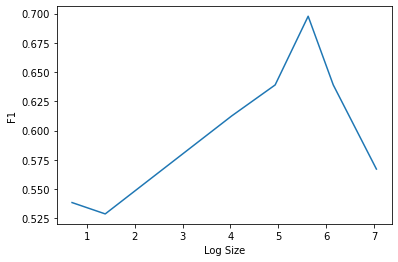

In [ ]:
c_values = [0.001, 0.01, 0.03, 0.05, 1, 10,50, 100, 1000]
scores, sizes = [], []
for c in c_values:
    np.random.seed(0)
    lr_pipe = Pipeline([  ("cv",CountVectorizer()),
                    ("model",LogisticRegression(tol=0.015,solver = "liblinear"))])


    #2
    lr_pipe.set_params(model__penalty = 'l1', model__C = c).fit(train_data,train_labels)

    vocab_list_all = lr_pipe['cv'].get_feature_names_out()

    #3 - finding the reduced vocabulary list
    #To do: checke the algortihm for detecting at least one non-zero value for each feature
    vocab_list_reduced = vocab_list_all[lr_pipe['model'].coef_.sum(axis=0) != 0]


    #Assertion to prevent errors
    if (vocab_list_reduced.shape[0] == 0):
        continue

    #3 - creating the L2 model
    #set L2 regularization strength to 0.5
    lr_pipe.set_params(cv__vocabulary= vocab_list_reduced,model__penalty = 'l2', model__C = 0.5).fit(train_data,train_labels)

    #dev_labels(Actual Labels) and lr_pipe.predict(dev_data) are the predicted values
    #4 Print C, vocab size, f1 score
    f1_score = metrics.f1_score(dev_labels, lr_pipe.predict(dev_data), average = "weighted")
    print(f"Reduced vocab size: C={c} size={vocab_list_reduced.shape[0]} fl score:{f1_score}")

    scores.append( f1_score)
    sizes.append(np.log(vocab_list_reduced.shape[0]))

#5
plt.plot(sizes,scores);
plt.xlabel("Log Size");
plt.ylabel("F1");



In [ ]:
pd.DataFrame(list(zip(sizes,scores)),columns=["Sizes","F1 Scores"])


,Sizes,F1 Scores
0,0.693147,0.538462
1,1.386294,0.528757
2,4.025352,0.612479
3,4.934474,0.639031
4,5.624018,0.697773
5,6.148468,0.639031
6,7.049255,0.567100


### Part 5: TfIdf

In [ ]:

np.random.seed(0)
lr_pipe = Pipeline([  ("tfidf",TfidfVectorizer()),
                ("model",LogisticRegression(C=100,solver = "liblinear",multi_class="auto"))])
lr_pipe.fit(train_data,train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('model', LogisticRegression(C=100, solver='liblinear'))])

In [ ]:
def run_Rratio(lr_pipe):
    probs = lr_pipe.predict_proba(dev_data)

    #finds max prob in each sample
    max_probs = probs.max(axis=1)



    #for every sample selct the probability of the actual label
    correct_probs = [row[dev_labels[row_index]] for row_index,row in enumerate(probs)]


    #Taking the predicted probs and dividing by the correct probs
    Rratio = max_probs/correct_probs

    #print(probs[:3],max_probs[:3],correct_probs[:3],dev_labels[:3],sep='\n\n')

    df_probs = pd.DataFrame(probs,columns=categories)
    #df_probs["dev_label"] = dev_labels
    df_probs["max_prob"] = probs.max(axis=1)
    df_probs["correct_prob"] = [row[dev_labels[i]] for i,row in enumerate(probs)]
    df_probs["Rratio"] = df_probs["max_prob"]/df_probs["correct_prob"]
    df_probs["dev_label"] = dev_labels
    df_probs["pred_label"] = np.argmax(probs,axis=1)

    return df_probs.sort_values(by="Rratio",ascending=False)


In [ ]:

df_Rratios = run_Rratio(lr_pipe)
df_Rratios.head(3)


,military,religious,school,workplace,max_prob,correct_prob,Rratio,dev_label,pred_label
9,0.012406,0.019024,0.039872,0.928698,0.928698,0.019024,48.816657,1,3
8,0.031686,0.028854,0.029715,0.909745,0.909745,0.031686,28.711604,0,3
0,0.014784,0.012068,0.161638,0.811510,0.811510,0.161638,5.020538,2,3
